# **Session 2**



# **Class content for Session 2**

1.   Discussion of the homework
2.   Extraction of specific rows (observations) and columns (variables).
3.   Visualization of *two* quantitative variables


We use again the ski data set.

In [1]:
# Loading packages and data
import pandas as pd
import seaborn as sns

df_ski = pd.read_csv('https://www.dropbox.com/scl/fi/pgfw6h0x9pxbr7c01jg6k/SkiData-FRG.csv?rlkey=yupn270yn4s4xnigoeasv084e&dl=1')
df_ski

,Station,Price,Mountain,AltitudeDown,AltitudeTop,Slopes,Lifts
0,Abondance,127,Alpes du Nord,1140,1700,13,9
1,Abries en Queyras,150,Alpes du Sud,1550,2450,16,5
2,Aillons Margeriaz,115,Alpes du Nord,1000,1900,40,18
3,Albiez Montrond,133,Alpes du Nord,1500,2100,26,11
4,Alpe dHuez,267,Alpes du Nord,1860,3300,111,70
...,...,...,...,...,...,...,...
199,Vars,200,Alpes du Sud,1650,2750,72,26
200,Vaujany,172,Alpes du Nord,1650,2800,30,20
201,Ventron,123,Vosges,870,1150,10,7
202,Villard de Lans,178,Alpes du Nord,1143,2050,52,20


# **Part 1 -- Extracting observations and variables (Boolean masks)**

We first explore how to select the observations that meet specific criteria. This is quite useful to manipulate data, and we will use this, in particular, to improve the scatterplots we introduced last time.

## Conditional statements

* Symbols to compare numbers:

==, >, =>, <, <=
* Equality == can be used to compare 'anything' (any type of objects: vectors, tables, matrices, datasets, etc.)
* Outcome a Boolean value: **False** or **True**



In [ ]:
# Outcome can be either 'True' or 'False'
(5 < 6)

In [ ]:
# Compare to:
(5 == 6)

In [ ]:
# Tests may be combined
#   & stands for 'and'
#   | stands for 'or'

print('(2<3) & (3*4 <11) -->', (2<3) & (3*4 <11))
print('(2<3) | (3*4 <11) -->', (2<3) | (3*4 <11))
print('(1==2) == (2==3)  -->',(1==2) == (2==3))


In [ ]:
1 == True, 0 == False

In [ ]:
# A useful trick: converting True -> 1, False -> 0
True + 0, False + 0

## Extracting rows

In [ ]:
# Stations from Vosges only:
row_mask = (df_ski['Mountain'] == 'Vosges')
row_mask

*Row mask* is a pandas series, with the same indices as the original dataset, and with Boolean values in each entries (True/False).

In [ ]:
# The following command returns the observations of df_ski for which the entry of row_mask is True:
df_ski[row_mask]

In [ ]:
# You may also often encounter the following more direct way of coding the same thing:
df_ski[df_ski['Mountain'] == 'Vosges']

In [ ]:
# Let's play a bit with the row_mask:
# We may force the conversion of False/True into numbers 0/1 as follows:
row_mask+0

In [ ]:
# Note that the following command returns an error:
df_ski[row_mask+0]

In [ ]:
# How many stations in the Vosges?
row_mask.sum()

## Exercice 1: ski dataset, continued

1. Define the variable **ElevationGain** as the difference between **AltitudeTop** and **AltitudeDown**, and display all stations with an elevation gain smaller than 150 meters.

2. Consider stations with 10 or fewer slopes. How many such stations are in the data set? Produce a histogram of the prices they charge. Which is the outlier station?

In [ ]:
df_ski["ElevationGain"] = df_ski['AltitudeTop'] - df_ski['AltitudeDown']

df_ski[df_ski["ElevationGain"] <= 150]


df_ski.describe()

from loguru import logger
from rich import console,print,pretty
pretty.install()

slopesMask = df_ski[df_ski["Slopes"] < 10]

sortedMask = slopesMask.sort_values(by="Slopes",ascending= True)

logger.info("Les sorted masked stations \n")
print(sortedMask)
slopesMask.describe()




2025-09-03 08:17:48.380 | INFO     | __main__:<module>:15 - Les sorted masked stations 



Station  Price        Mountain  AltitudeDown  \
166           Saint Jean de Sixt     40   Alpes du Nord           940   
76             La Grave la Meije    258    Alpes du Sud          1450   
20                       Bessans     51   Alpes du Nord          1740   
90          Le Desert dEntremont     54   Alpes du Nord          1200   
93                    Le Granier     54   Alpes du Nord          1000   
73         La Combe Saint Pierre     60            Jura           880   
77            La Loge des Gardes     50  Massif central          1000   
185          Turini Camp dArgent     75    Alpes du Sud          1600   
41                  Col de Porte     70   Alpes du Nord          1200   
40                Col de Marcieu     65   Alpes du Nord          1000   
135  Montmin - Col de la Forclaz     50   Alpes du Nord          1090   
58                       Goulier     95        Pyrénées          1500   
110                  Les Coulmes     45   Alpes du Nord          1064   
100      Le Sappey en Chartreuse     60   Alpes du Nord           960   
158                        Romme     60   Alpes du Nord          1200   
149                     Praboure     50  Massif central          1265   
123              Lus la Jarjatte     66   Alpes du Nord          1140   
192                   Val Pelens     75    Alpes du Sud          1600   
56                  Gaschney 360     85          Vosges           980   
39              Col de lArzelier     75   Alpes du Nord          1154   
25                     Brameloup     70  Massif central          1200   
87     Le Bleymard - Mont Lozere     65  Massif central          1360   
69             La Bresse Lispach     97          Vosges           910   
67             La Bresse Brabant     91          Vosges           880   
27          Bussang - Larcenaire     87          Vosges           822   
86             Le Ballon dAlsace    100          Vosges           820   
74            La Croix de Bauzon     79  Massif central          1250   
180                 Serre Eyraud     75    Alpes du Sud          1480   
85             Laye en Champsaur    106    Alpes du Sud          1300   

     AltitudeTop  Slopes  Lifts  ElevationGain  
166         1000       1      1             60  
76          3550       1      3           2100  
20          2000       3      3            260  
90          1400       3      3            200  
93          1420       4      4            420  
73          1035       4      4            155  
77          1160       4      4            160  
185         1920       4      3            320  
41          1650       5      5            450  
40          1400       6      6            400  
135         1180       6      3             90  
58          1850       6      4            350  
110         1463       6      3            399  
100         1350       6      5            390  
158         1580       7      4            380  
149         1400       7      4            135  
123         1510       7      5            370  
192         1750       7      2            150  
56          1290       7      3            310  
39          1500       7      4            346  
25          1390       7      5            190  
87          1600       7      5            240  
69          1120       8      5            210  
67          1000       8      3            120  
27           970       8      5            148  
86          1150       9     10            330  
74          1511       9      5            261  
180         2100       9      3            620  
85          1850       9      7            550

,Price,AltitudeDown,AltitudeTop,Slopes,Lifts,ElevationGain
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,76.137931,1171.896552,1520.655172,6.034483,4.172414,348.758621
std,39.143257,251.283611,497.193644,2.243765,1.670521,363.639702
min,40.000000,820.000000,970.000000,1.000000,1.000000,60.000000
25%,54.000000,980.000000,1180.000000,4.000000,3.000000,160.000000
50%,70.000000,1154.000000,1420.000000,7.000000,4.000000,310.000000
75%,85.000000,1300.000000,1650.000000,7.000000,5.000000,390.000000
max,258.000000,1740.000000,3550.000000,9.000000,10.000000,2100.000000


In [17]:
int((df_ski["Slopes"] <=10).sum())

36

## Extracting rows and columns.

In [ ]:
# We have already seen how to extract specific columns, by specifying a list (between backets) of the relevant variables
# For instance,


df_ski[['Mountain','AltitudeTop']]

To extract *simultaneously* rows and columns, we use the following approach.

* Assume that we are given a mask on the rows `row_mask`
* Assume that we are given a mask on the columns `column_mask`

We can select the corresponding observations (rows) and variables (columns) using the following command:

`df_ski.loc[row_mask,column_mask]`

To illustrate, we will create a new variable `Range`, grouping the mountains together into only three possible categories: Alpes, Pyrénées and older (and lower) mountains.

* `Range = Alpes` **if** `Mountain = Alpes du Nord`, or `Mountain = Alpes du Sud`
* `Range=Other` **if** `Mountain = Massif Central`, or `Mountain = Vosges` or `Mountain = Jura`
* `Range = Pyrenees` **if** `Mountain = Pyrenees`

To do this, we first create this new column by setting all values equal to the default value *Other*, next change this value to Pyrénées/Alpes whenever relevant.


In [ ]:
df_ski['Range'] = 'Other'

# For stations in the Pyrénées, we change this variable to Pyrénées
row_mask = (df_ski['Mountain'] == 'Pyrénées')
df_ski.loc[row_mask,'Range'] = 'Pyrénées'

# For stations in the Alpes, we change it to Alpes
row_mask = (df_ski['Mountain'] == 'Alpes du Nord') | (df_ski['Mountain'] == 'Alpes du Sud')
df_ski.loc[row_mask,'Range'] = 'Alpes'

In [ ]:
# Outcome:
df_ski

In [ ]:
# We do not see much, let's sample stations at random:
df_ski.sample(10)

# **Part 2: Improving scatterplots**

Last time, we produced a scatterplot to visualize the relation between prices and slope numbers (see next cell). We noticed that the presence of outliers makes it difficult to visualize this relation.

In [ ]:
df_ski.plot(x='Slopes', y='Price', kind='scatter')

We here apply the tools we have just introduced to improve such a graph.

### Method 1: suppressing outliers in a scatterplot

In [ ]:
# Seaborn syntax:
sns.scatterplot(data=df_ski[df_ski['Slopes']<200], x='Slopes', y='Price')

### Method 2: Transforming the variables

The above scatterplot points to a clear association between the number of slopes and the price, but not to a linear relation.

In such cases, one may try and transform existing variables in the hope that simpler relations appear. Here, a logarithm looks suitable:

In [ ]:
# We import the numpy library for scientific computations
# The logarithm function is np.log
import numpy as np

np.log(2)

In [ ]:
df_ski['LnSlopes']= np.log(df_ski['Slopes'])
df_ski

In [ ]:
# Now the association looks linear!
sns.scatterplot(data=df_ski[df_ski['Slopes']<200], x='LnSlopes', y='Price')

### Method 3: Colorings points by a categorical variable

The above plot show a relation between the logarithm of the number of slopes and the price. How does this relation depend on the mountain of the station?

In [ ]:
sns.scatterplot(data=df_ski[df_ski['Slopes']<200], x='LnSlopes', y='Price',hue = 'Mountain')

,Station,Price,Mountain,AltitudeDown,AltitudeTop,Slopes,Lifts,ElevationGain,Range,LnSlopes
51,Flaine,246,Alpes du Nord,1600,2500,64,24,900,Alpes,4.158883
190,Val dIsere,285,Alpes du Nord,1850,3456,76,42,1606,Alpes,4.330733
67,La Bresse Brabant,91,Vosges,880,1000,8,3,120,Vosges,2.079442
121,Les Saisies,185,Alpes du Nord,1150,2069,61,31,919,Alpes,4.110874
136,Montriond,255,Alpes du Nord,970,2350,50,34,1380,Alpes,3.912023
35,Champagny en Vanoise,265,Alpes du Nord,1250,3250,134,74,2000,Alpes,4.897840
46,Courchevel,256,Alpes du Nord,1350,2738,100,52,1388,Alpes,4.605170
87,Le Bleymard - Mont Lozere,65,Massif central,1360,1600,7,5,240,Massif,1.945910
144,Peisey Vallandry,265,Alpes du Nord,1650,3250,128,54,1600,Alpes,4.852030
2,Aillons Margeriaz,115,Alpes du Nord,1000,1900,40,18,900,Alpes,3.688879


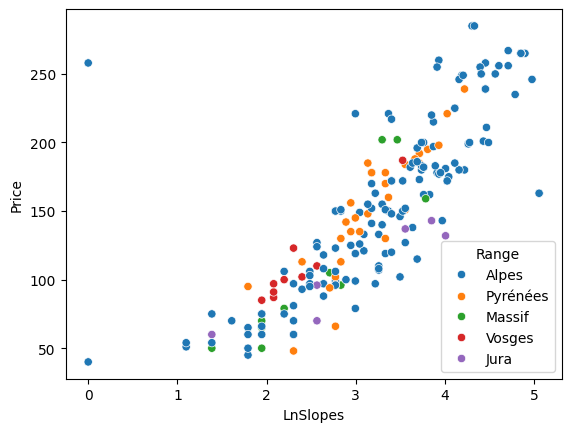

In [29]:
# There are simply too many colors in the previous plot.
# To improve upon it, we use instead the type of mountain
import numpy as np


df_ski["Range"] = df_ski['Mountain'].apply(lambda x: x.split(" ")[0])
df_ski["LnSlopes"]= np.log(df_ski['Slopes'])

sns.scatterplot(data=df_ski[df_ski['Slopes']<200], x='LnSlopes', y='Price', hue='Range')
# This is much more readable than when using all the different mountains!

df_ski.sample(10)


## Exercise 2

1. Is **AltitudeDown** influential for the **Price**? Answer based on a well-chosen picture.

2. Do some mountain ranges offer better deals in terms of prices for elevation gain ?

(array([[0.04610749]]), array([90.73583557]), 0.04970964696025659)

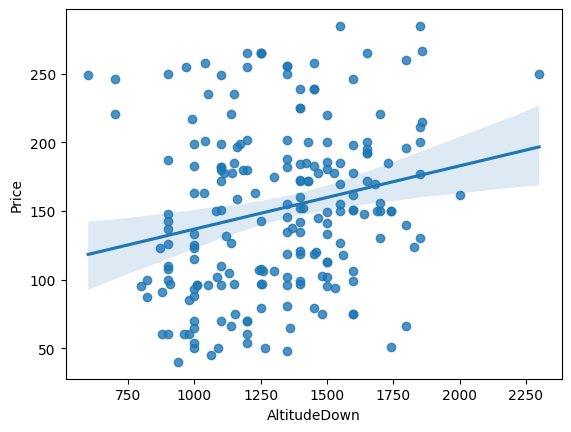

In [34]:
sns.regplot(data=df_ski, x="AltitudeDown",y="Price")


from sklearn import linear_model

reg= linear_model.LinearRegression()
reg.fit(df_ski[["AltitudeDown"]],df_ski[["Price"]])

reg.coef_, reg.intercept_, reg.score(X=df_ski[["AltitudeDown"]], y=df_ski[["Price"]])



<Axes: xlabel='AltitudeDown', ylabel='Price'>

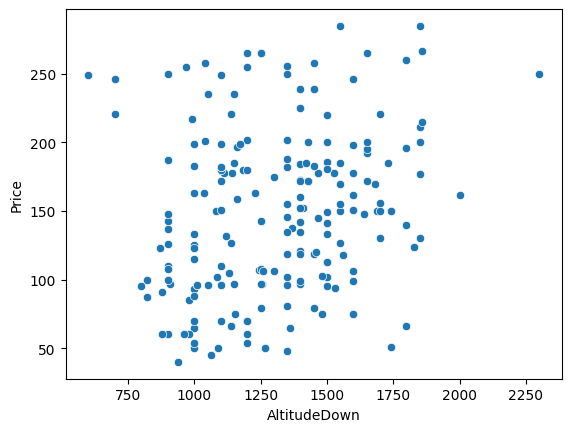

In [23]:

sns.scatterplot(data=df_ski, x="AltitudeDown",y="Price")

<Axes: xlabel='ElevationGain', ylabel='Price'>

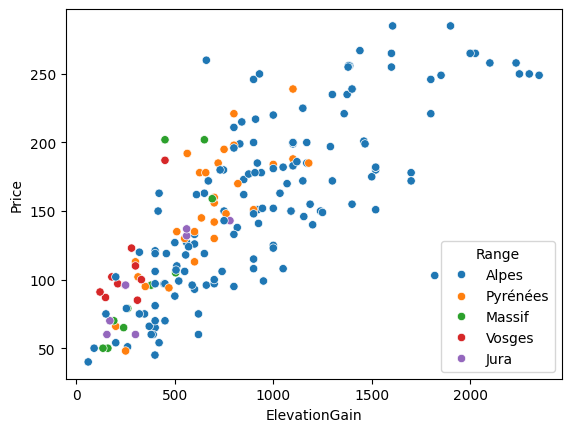

In [ ]:
sns.scatterplot(data=df_ski, y='Price', x='ElevationGain', hue='Range')
sns.re


# **Part 3: Single quantitative variable by a categorical variable**

Scatterplots with hue are a great tool to visualize the relation between *two* quantitative variables, conditional on *one* categorical variable.

Here, we address the visualization of *one* quantitative variable, conditional on a categorical one. The chief objective is to assess visually the extent to which the distribution of the quantitative variable depends on the value of the categorical one. That is, to figure out the conditional distribution of the quantitative variable, given the categorical one.

We use the versatile *catplot* tool from seaborn.

#### Conditional boxplots

In [ ]:
sns.catplot(data = df_ski, x = 'Range', y ='Price', kind = 'box')

#### Conditional barplots (with standard errors)

In [ ]:
# Mean plots: heights = sample means; bars = +/- 1.96 * standard errors
# (where we recall that standard error = standard deviation / sqrt(sample size),
# a.k.a. half width of a symmetric confidence interval)
sns.catplot(data=df_ski, x='Range', y='Price', kind='bar')

How to draw conclusions from such a graph:

<font color='blue'>We read significant differences in average prices between resorts in the 'Other' category vs. 'Alpes' and 'Pyrénées', and no significant difference in average prices between 'Alpes' and 'Pyrénées'.</font>

## Exercise 3

1. Illustrate how **AltitudeTop** varies by the mountain ranges.

2. Do some mountain ranges offer better deals in terms of prices for elevation gain ? Answer using barplot.

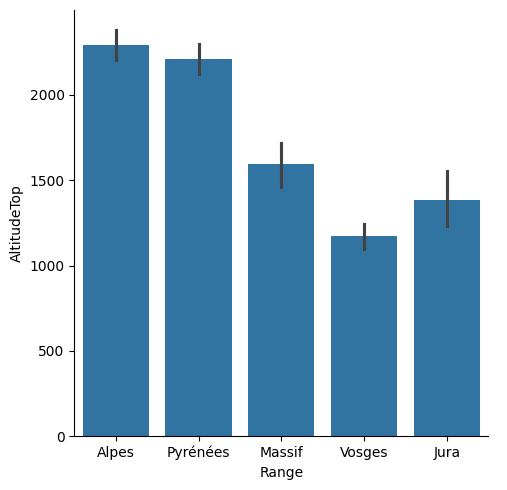

In [39]:
sns.catplot(data=df_ski, x='Range', y='AltitudeTop', kind='bar')

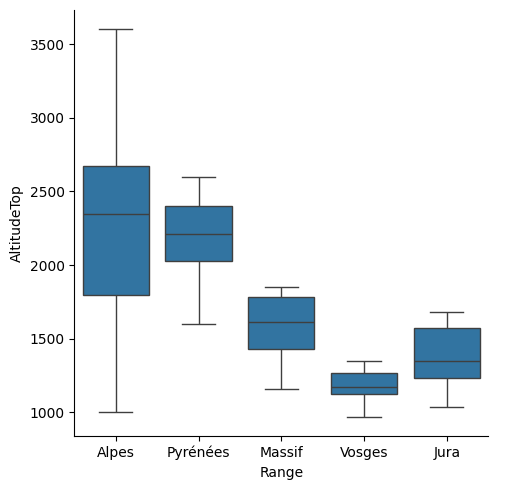

In [38]:
sns.catplot(data=df_ski, x='Range', y='AltitudeTop', kind='box')


## Numerical statistics (advanced topic)

Commands are of the following form, featuring **groupby**:

In [ ]:
df_ski.groupby('Range')['Price'].describe()

YA UNE FONCTION QUI S4APPELLE GROUPBY, ELLE EST TRES PRATIQUE AHAHAHAHA

# **Wrap up/Summary of main commands**

Today, we
- extracted subsets of rows and/or columns from a data set,
    - based on logical conditions, defining masks:

    `df['row_mask']`

    `df['col_mask']`

    - and applied this all to zooming in scatter plots (to removing outliers);
- displayed pairs of quantitative variables by a categorical variable:

    `sns.scatterplot(data = df, x = 'variable_name', y = 'variable_name', hue = 'variable_name')`

- saw how to graphically (and numerically) analyze a quantitative variable by a categorical variable, with box plots

    `sns.catplot(data = df, x = 'variable_name', y = 'variable_name', kind = 'box')`

 and barplots:

    `sns.catplot(data = df, x = 'variable_name', y = 'variable_name',kind= 'bar')`

- Don't forget the **homework 2** for next time!
